In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv
import seaborn as sns

In [144]:
file = open('Files\Refined Data - Pivot Table 1.csv')
counts = open('Files\Refined Data - Sheet4.csv')

csvreader = csv.reader(file)
countsreader = csv.reader(counts)
header, county, disability, poverty, women, health, total, pharma, income, race, names = ([] for i in range(11))
header = next(csvreader)

counties = {}

for column in countsreader:
    names.append(column[0])

for column in csvreader:
    county.append(column[0])
    disability.append(column[1])
    poverty.append(column[2])
    women.append(column[3])
    health.append(column[4])
    total.append(column[5])
    pharma.append(column[6])
    income.append(column[7])
    race.append(column[8])

county.remove("")
county.remove("Grand Total")
disability.remove("0")
poverty.remove("0")
women.remove("0")
health.remove("0")
total.remove("0")
pharma.remove("32")
race.remove('')
income.remove("")
income.pop(len(income) - 1)
pharma.pop(len(pharma) -1)
poverty.pop(len(poverty) - 1)
race.pop(len(race) - 1)

disability = [eval(i) for i in disability]
poverty = [eval(i) for i in poverty]
women = [eval(i) for i in women]
health = [eval(i) for i in health]
total = [eval(i) for i in total]
pharma = [eval(i) for i in pharma]
income = [eval(i) for i in income]
race = [eval(i) for i in race]

for i in range(len(county)):
    counties[county[i]] = names[i]


In [145]:
def turnDict(pharma, marginalized, county):
    index = {}

    for x in range(len(pharma)):
        index[county[x]] = "%.10f" % round(pharma[x]/marginalized[x], 10)
    
    return index
    

In [146]:
index_disabled = turnDict(pharma, disability, county)
index_poverty = turnDict(pharma, poverty, county)
index_women = turnDict(pharma, women, county)
index_health = turnDict(pharma, health, county)
index_tot = turnDict(pharma, total, county)
index_race = turnDict(pharma, race, county)

In [ ]:
sorted_index_disabled = sorted(index_disabled.items(), key=lambda x:x[1])
sorted_index_poverty = sorted(index_poverty.items(), key=lambda x:x[1])
sorted_index_women = sorted(index_women.items(), key=lambda x:x[1])
sorted_index_race = sorted(index_race.items(), key=lambda x:x[1])


county_disabled_bottom, ind_disabled_bottom, county_poverty_bottom, ind_poverty_bottom, county_women_bottom, ind_women_bottom, county_race_bottom, ind_race_bottom = ([] for i in range(8))

for i in range(10):
    county_disabled_bottom.append(counties[sorted_index_disabled[i][0]])
    ind_disabled_bottom.append(eval(sorted_index_disabled[i][1]))
    county_poverty_bottom.append(counties[sorted_index_poverty[i][0]])
    ind_poverty_bottom.append(eval(sorted_index_poverty[i][1]))
    county_women_bottom.append(counties[sorted_index_women[i][0]])
    ind_women_bottom.append(eval(sorted_index_women[i][1]))
    county_race_bottom.append(counties[sorted_index_race[i][0]])
    ind_race_bottom.append(eval(sorted_index_race[i][1]))



# plt.barh(county_disabled_bottom, ind_disabled_bottom)
# plt.barh(county_poverty_bottom, ind_poverty_bottom)
plt.barh(county_women_bottom, ind_women_bottom)
# plt.barh(county_race_bottom, ind_race_bottom)
plt.ylabel("Counties")
plt.xlabel("Index")
plt.title("Bottom 10 Counties for Pharmacies per people of color")
plt.show()

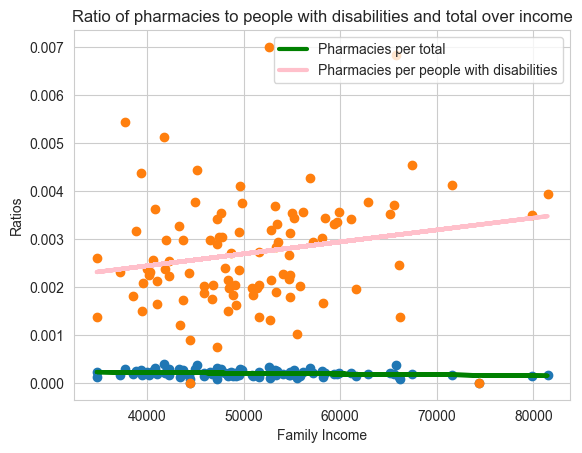

In [150]:
pov, wom, ra, dis, inc = ([] for i in range(5))

for i in range(len(poverty)):
    pov.append(pharma[i]/poverty[i])
    wom.append(pharma[i]/women[i])
    ra.append(pharma[i]/race[i])
    dis.append(pharma[i]/disability[i])
    inc.append(pharma[i]/total[i])


a = np.polyfit(income, pov, 1)
b = np.poly1d(a)

c = np.polyfit(income, inc, 1)
d = np.poly1d(c)

e = np.polyfit(income, wom, 1)
f = np.poly1d(e)

g = np.polyfit(income, ra, 1)
h = np.poly1d(g)

i = np.polyfit(income, dis, 1)
j = np.poly1d(i)

sns.set_style('whitegrid')

# plt.scatter(income,pov)
plt.scatter(income, inc)
# plt.scatter(income, wom)
# plt.scatter(income, ra, color="yellow")
plt.scatter(income, dis)

plt.title("Ratio of pharmacies to people with disabilities and total over income")
plt.xlabel("Family Income")
plt.ylabel("Ratios")

# plt.plot(income, b(income), color='red', label="Pharamacies per poverty", linestyle='-', linewidth=3)
plt.plot(income, d(income), color='green', label="Pharmacies per total", linestyle='-', linewidth=3)
# plt.plot(income, f(income), color='yellow', label="Pharmacies per women who gave birth", linestyle='-', linewidth=3)
# plt.plot(income, h(income), color='purple', label="Pharmacies per people of color", linestyle='-', linewidth=3)
plt.plot(income, j(income), color='pink', label="Pharmacies per people with disabilities", linestyle='-', linewidth=3)

plt.legend()
